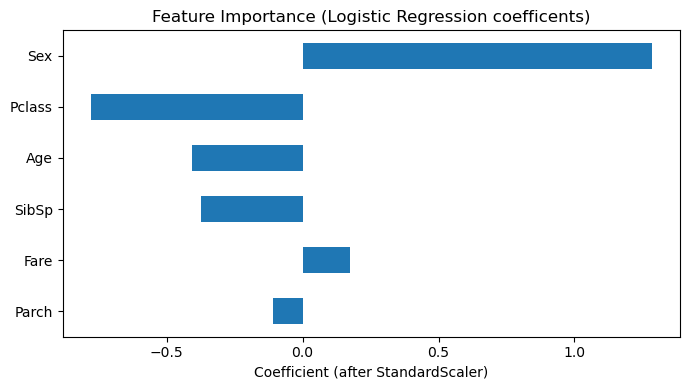

Coefficients (higher magnitude=stronger impact):
Parch   : -0.109 -> decreases survival
Fare    : +0.173 -> increased survival
SibSp   : -0.375 -> decreases survival
Age     : -0.409 -> decreases survival
Pclass  : -0.780 -> decreases survival
Sex     : +1.285 -> increased survival


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# load cleaned data
df=pd.read_csv("downloads/titanic_clean.csv")

# Features and target
X=df[['Pclass','Sex','Age','Fare','SibSp','Parch']]
y=df['Survived']

#Train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

#Pipeline: Standardize features+Logistic regression

pipe=make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train,y_train)

# get trained LR model and its coefficients
lr= pipe.named_steps['logisticregression']
coefs=pd.Series(lr.coef_[0],index=X.columns)

#Sort by absolute impact and plot
coefs_sorted= coefs.reindex(coefs.abs().sort_values().index)

plt.figure(figsize=(7,4))
coefs_sorted.plot(kind='barh')
plt.title("Feature Importance (Logistic Regression coefficents)")
plt.xlabel("Coefficient (after StandardScaler)")
plt.tight_layout()
plt.show()

#print a friendly summary
print("Coefficients (higher magnitude=stronger impact):")
for f,v in coefs_sorted.items():
    sign="increased survival" if v>0 else "decreases survival"
    print(f"{f:8s}: {v:+.3f} -> {sign}")